### Centro Universit√°rio Senac  
**Professor:** Rafael C√≥be  
**Disciplina:** Introdu√ß√£o ao Aprendizado de M√°quina  

### Projeto - **Detec√ß√£o de fraudes em transa√ß√µes de Cart√£o de Cr√©dito**

### Autores
**Renato Calabro (calabro@live.com)**
**√Ågata Oliveira (agata.aso@hotmail.com)**
**Lucas Parisi ()**
**Douglas Carvalho Rocha (douglas.particular@gmail.com)**
**Angel Guillermo Morales Romero (aguilhermemr@gmail.com)**

### Descri√ß√£o

√â importante que as empresas de cart√£o de cr√©dito sejam capazes de reconhecer transa√ß√µes
fraudulentas com cart√£o de cr√©dito para que os clientes n√£o sejam cobrados por itens que n√£o
compraram.
Esse conjunto de dados est√° dispon√≠vel ap√≥s passar pelo algoritmo PCA. Isso garante o
anonimato.
Nesse projeto, o maior desafio ser√° lidar com classes desbalanceadas. Aqui podem ser
utilizadas uma gama de algoritmos para an√°lise de dados, al√©m de estrat√©gias para otimiza√ß√£o
de hiperpar√¢metros e combina√ß√£o de classificadores.

### Considera√ß√µes sobre PCA

- PCA (Principal Component Analysis) transforma vari√°veis originais em combina√ß√µes lineares ortogonais, maximizando a vari√¢ncia explicada.
- As componentes PCA:
  - S√£o centradas e padronizadas (m√©dia ‚âà 0).
  - Perdem interpretabilidade direta.
  - Est√£o ordenadas por import√¢ncia (V1 > V2 > ... > V28).
- Portanto, **transforma√ß√µes adicionais sobre componentes PCA (ex: log, minmax)** **n√£o s√£o recomendadas**.

In [ ]:
!../.venv/bin/python --version
%pip install -r ../requirements.txt

In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import arff

base_path = Path("../datasets/credit-card-fraud")


### Sobre os dados - CreditCardFraudDetection

Ref: https://www.openml.org/search?type=data&sort=runs&id=42175&status=active

√â importante que as empresas de cart√£o de cr√©dito consigam reconhecer transa√ß√µes fraudulentas para que os clientes n√£o sejam cobrados por itens que n√£o compraram.

#### Conte√∫do

O conjunto de dados cont√©m transa√ß√µes realizadas com cart√µes de cr√©dito em setembro de 2013 por portadores de cart√£o europeus. O dataset apresenta transa√ß√µes que ocorreram ao longo de dois dias, nas quais foram identificadas 492 fraudes entre 284.807 transa√ß√µes. O conjunto √© altamente desbalanceado: a classe positiva (fraudes) representa apenas 0,172% de todas as transa√ß√µes.

Ele cont√©m apenas vari√°veis num√©ricas como entrada, que s√£o resultado de uma transforma√ß√£o via PCA. Infelizmente, por quest√µes de confidencialidade, n√£o podemos fornecer as vari√°veis originais nem mais informa√ß√µes de contexto sobre os dados. As vari√°veis `V1`, `V2`, ..., `V28` s√£o os componentes principais obtidos via PCA; as √∫nicas vari√°veis que **n√£o** foram transformadas s√£o `Time` e `Amount`. 

- A vari√°vel `Time` representa o tempo (em segundos) decorrido desde a primeira transa√ß√£o do dataset.
- A vari√°vel `Amount` representa o valor da transa√ß√£o, podendo ser usada em estrat√©gias de aprendizado sens√≠vel a custo.
- A vari√°vel `Class` √© a vari√°vel alvo, assumindo o valor 1 em caso de fraude e 0 caso contr√°rio.

#### Inspira√ß√£o

Identificar transa√ß√µes fraudulentas com cart√£o de cr√©dito.

Dado o desequil√≠brio entre as classes, recomenda-se avaliar o desempenho usando a m√©trica **√Årea sob a Curva Precis√£o-Revoca√ß√£o (AUPRC)**. A acur√°cia da matriz de confus√£o n√£o √© significativa nesse cen√°rio de classifica√ß√£o desbalanceada.

---

In [3]:
ratings_file = base_path / "dataset.arff"

data, meta = arff.loadarff(ratings_file)

raw_data = pd.DataFrame(data)
for col in raw_data.select_dtypes([object]):
    raw_data[col] = raw_data[col].str.decode('utf-8')

print(raw_data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
raw_data.shape

(284807, 31)

In [5]:
raw_data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

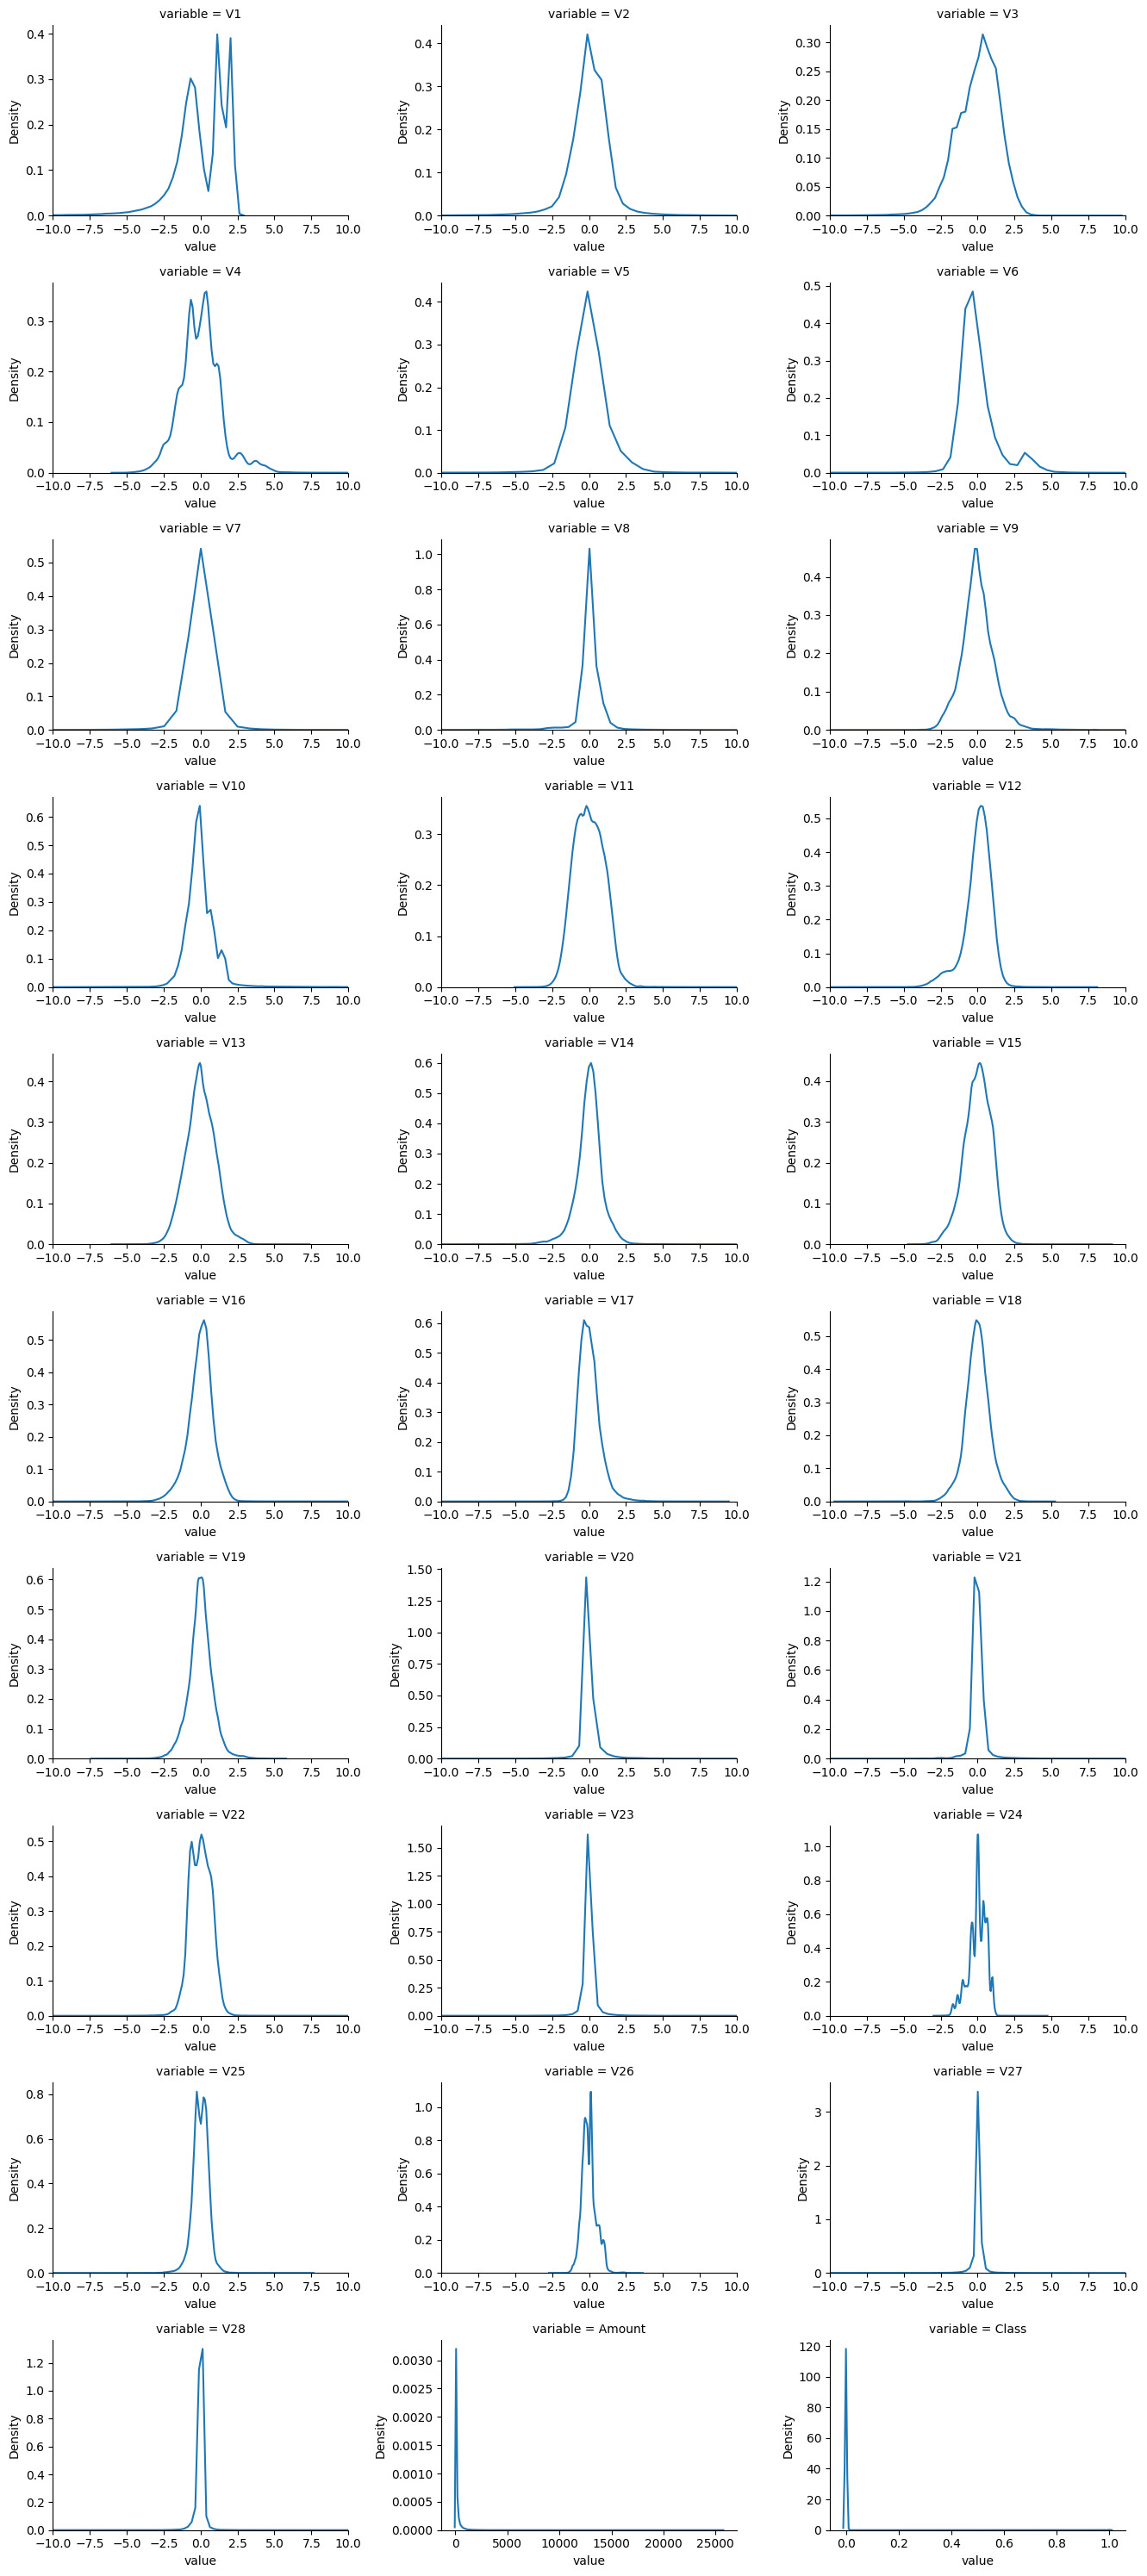

In [7]:
unpivot = pd.melt(raw_data, raw_data.describe().columns[0], raw_data.describe().columns[1:])

v_features = [f"V{i}" for i in range(1, 29)]
x_min = -10
x_max = 10

# Fun√ß√£o para aplicar xlim condicionalmente
def kde_with_custom_xlim(data, **kwargs):
    variable = data["variable"].iloc[0]
    ax = plt.gca()
    sns.kdeplot(data["value"], ax=ax, **kwargs)
    if variable in v_features:
        ax.set_xlim(x_min, x_max)

# Grid com escalas personalizadas
g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False, aspect=1.5)
g.map_dataframe(kde_with_custom_xlim)

plt.show()


#### V1 a V28 ‚Äì Componentes PCA

##### üîπ Distribui√ß√µes Sim√©tricas

Vari√°veis como `V2`, `V5`, `V8`, `V14`, `V15`, `V16`, `V17`, `V19`, `V25`, `V28` t√™m distribui√ß√£o centrada no zero e forma aproximadamente gaussiana.

- Indicativo de boa proje√ß√£o pelo PCA.
- **Devem ser mantidas** para modelagem.

##### üîπ Picos Muito Finos ‚Äì `V20`, `V21`

Apresentam densidade extremamente concentrada (picos altos e estreitos), indicando vari√¢ncia muito baixa.

- Prov√°vel aus√™ncia de informa√ß√£o relevante nessas dire√ß√µes do espa√ßo PCA.

##### üîπ Distribui√ß√µes Bimodais ou Irregulares ‚Äì `V1`, `V3`, `V4`, `V11`, `V13`, `V22`, `V24`, `V26`, `V27`

Mostram m√∫ltiplos picos ou caudas longas, sugerindo padr√µes distintos ‚Äî possivelmente associados √† separa√ß√£o entre transa√ß√µes leg√≠timas e fraudulentas.

- Podem ser bons indicadores discriminativos.
- **Devem ser mantidas** na modelagem.

#### Vari√°vel `Amount`

Distribui√ß√£o altamente assim√©trica com long tail (valores baixos predominantes, alguns valores extremos).

- N√£o foi transformada por PCA.
- **Aplicar algum tipo de regulariza√ß√£o**
  
#### Vari√°vel `Class`

Distribui√ß√£o extremamente desbalanceada, com a grande maioria dos valores iguais a 0 (transa√ß√µes leg√≠timas) e apenas uma fra√ß√£o muito pequena igual a 1 (fraudes).
Este desbalanceamento compromete o uso da acur√°cia como m√©trica de avalia√ß√£o.
Recomenda-se o uso de t√©cnicas para lidar com desbalanceamento, como:
    Atribui√ß√£o de pesos (class_weight='balanced');
    Estrat√©gias de oversampling (como SMOTE);
    Uso de m√©tricas adequadas, como F1-score, recall, ou √°rea sob a curva de precis√£o-revoca√ß√£o (AUPRC).


In [8]:
num_fraudulent_transactions = raw_data["Class"].loc[raw_data["Class"] == 1].count()
num_legit_transactions = raw_data["Class"].loc[raw_data["Class"] == 0].count()

print(f"Fraud: {num_fraudulent_transactions}")
print(f"Legit: {num_legit_transactions}")

Fraud: 492
Legit: 284315


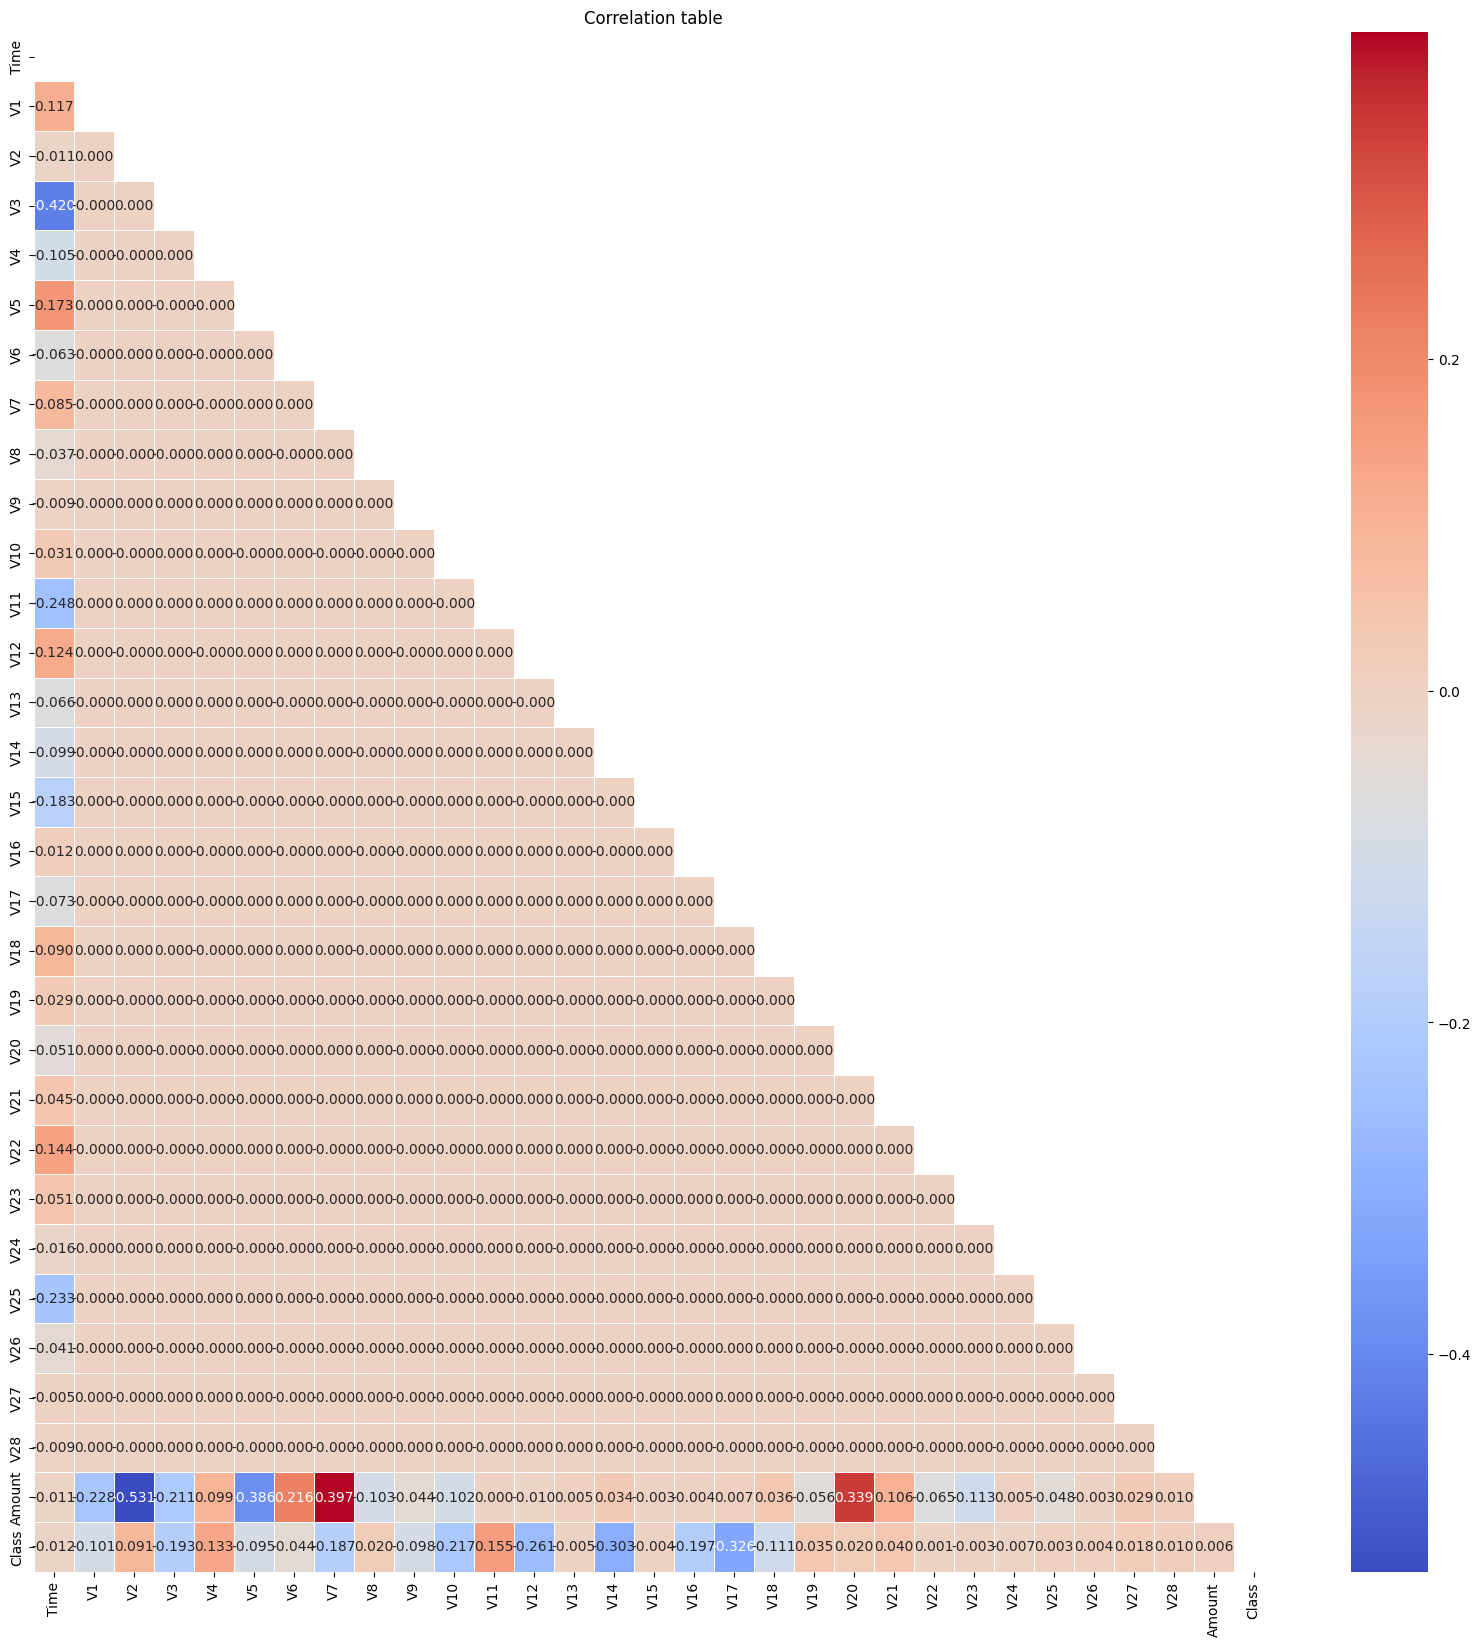

In [9]:
correlation = raw_data.corr()

plt.figure(figsize = (20, 20))

mask = np.triu(np.ones_like(correlation, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(
    data=np.round(correlation, 3),
    cmap="coolwarm",
    mask=mask,
    linewidths=0.5,
    annot=True,
    fmt=".3f"
)

plt.title("Correlation table")

plt.show()

#### An√°lise da matriz de correla√ß√£o

A matriz de correla√ß√£o revela que a maioria das vari√°veis apresenta correla√ß√£o pr√≥xima de zero entre si, o que √© esperado em dados transformados por PCA, j√° que os componentes principais s√£o, por defini√ß√£o, ortogonais. Por isso, √© comum encontrar valores como `0.000` fora da diagonal principal.

#### Correla√ß√£o entre vari√°veis

- N√£o h√° evid√™ncia de colinearidade forte entre componentes, o que √© consistente com a aplica√ß√£o correta do PCA.
- Pequenas correla√ß√µes residuais (ex: `V3` com `V1`) s√£o esperadas e n√£o comprometem a independ√™ncia entre os atributos.
- A presen√ßa de valores arredondados como `0.000` √© consequ√™ncia da natureza da transforma√ß√£o e da precis√£o usada na visualiza√ß√£o (tr√™s casas decimais).

#### Correla√ß√£o com a vari√°vel `Class`

- Nenhuma vari√°vel apresenta correla√ß√£o forte com a vari√°vel alvo (`Class`), o que √© comum em cen√°rios de fraude altamente desbalanceados.
- Algumas vari√°veis, como `V10`, `V14`, `V16` e `V17`, mostraram correla√ß√£o moderada (positiva ou negativa) com `Class`, indicando potencial preditivo.
- A aus√™ncia de correla√ß√£o linear forte n√£o implica irrelev√¢ncia ‚Äî muitas rela√ß√µes √∫teis para modelos de classifica√ß√£o s√£o n√£o-lineares ou combinat√≥rias.

#### Conclus√£o

Apesar de algumas vari√°veis aparentarem baixa vari√¢ncia ou correla√ß√£o nula, n√£o h√°, com base apenas na matriz de correla√ß√£o, evid√™ncia suficiente para descartar nenhuma das colunas. Como os dados passaram por PCA e todas as vari√°veis foram constru√≠das para capturar diferentes dire√ß√µes de vari√¢ncia no espa√ßo original, **todas as colunas podem ser potencialmente √∫teis na modelagem**.


/tmp/ipykernel_206764/349276422.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  figure.tight_layout()
/tmp/ipykernel_206764/349276422.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()
/home/rcalabro/codebase/senac-ia/machine-learning/.venv/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/rcalabro/codebase/senac-ia/machine-learning/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


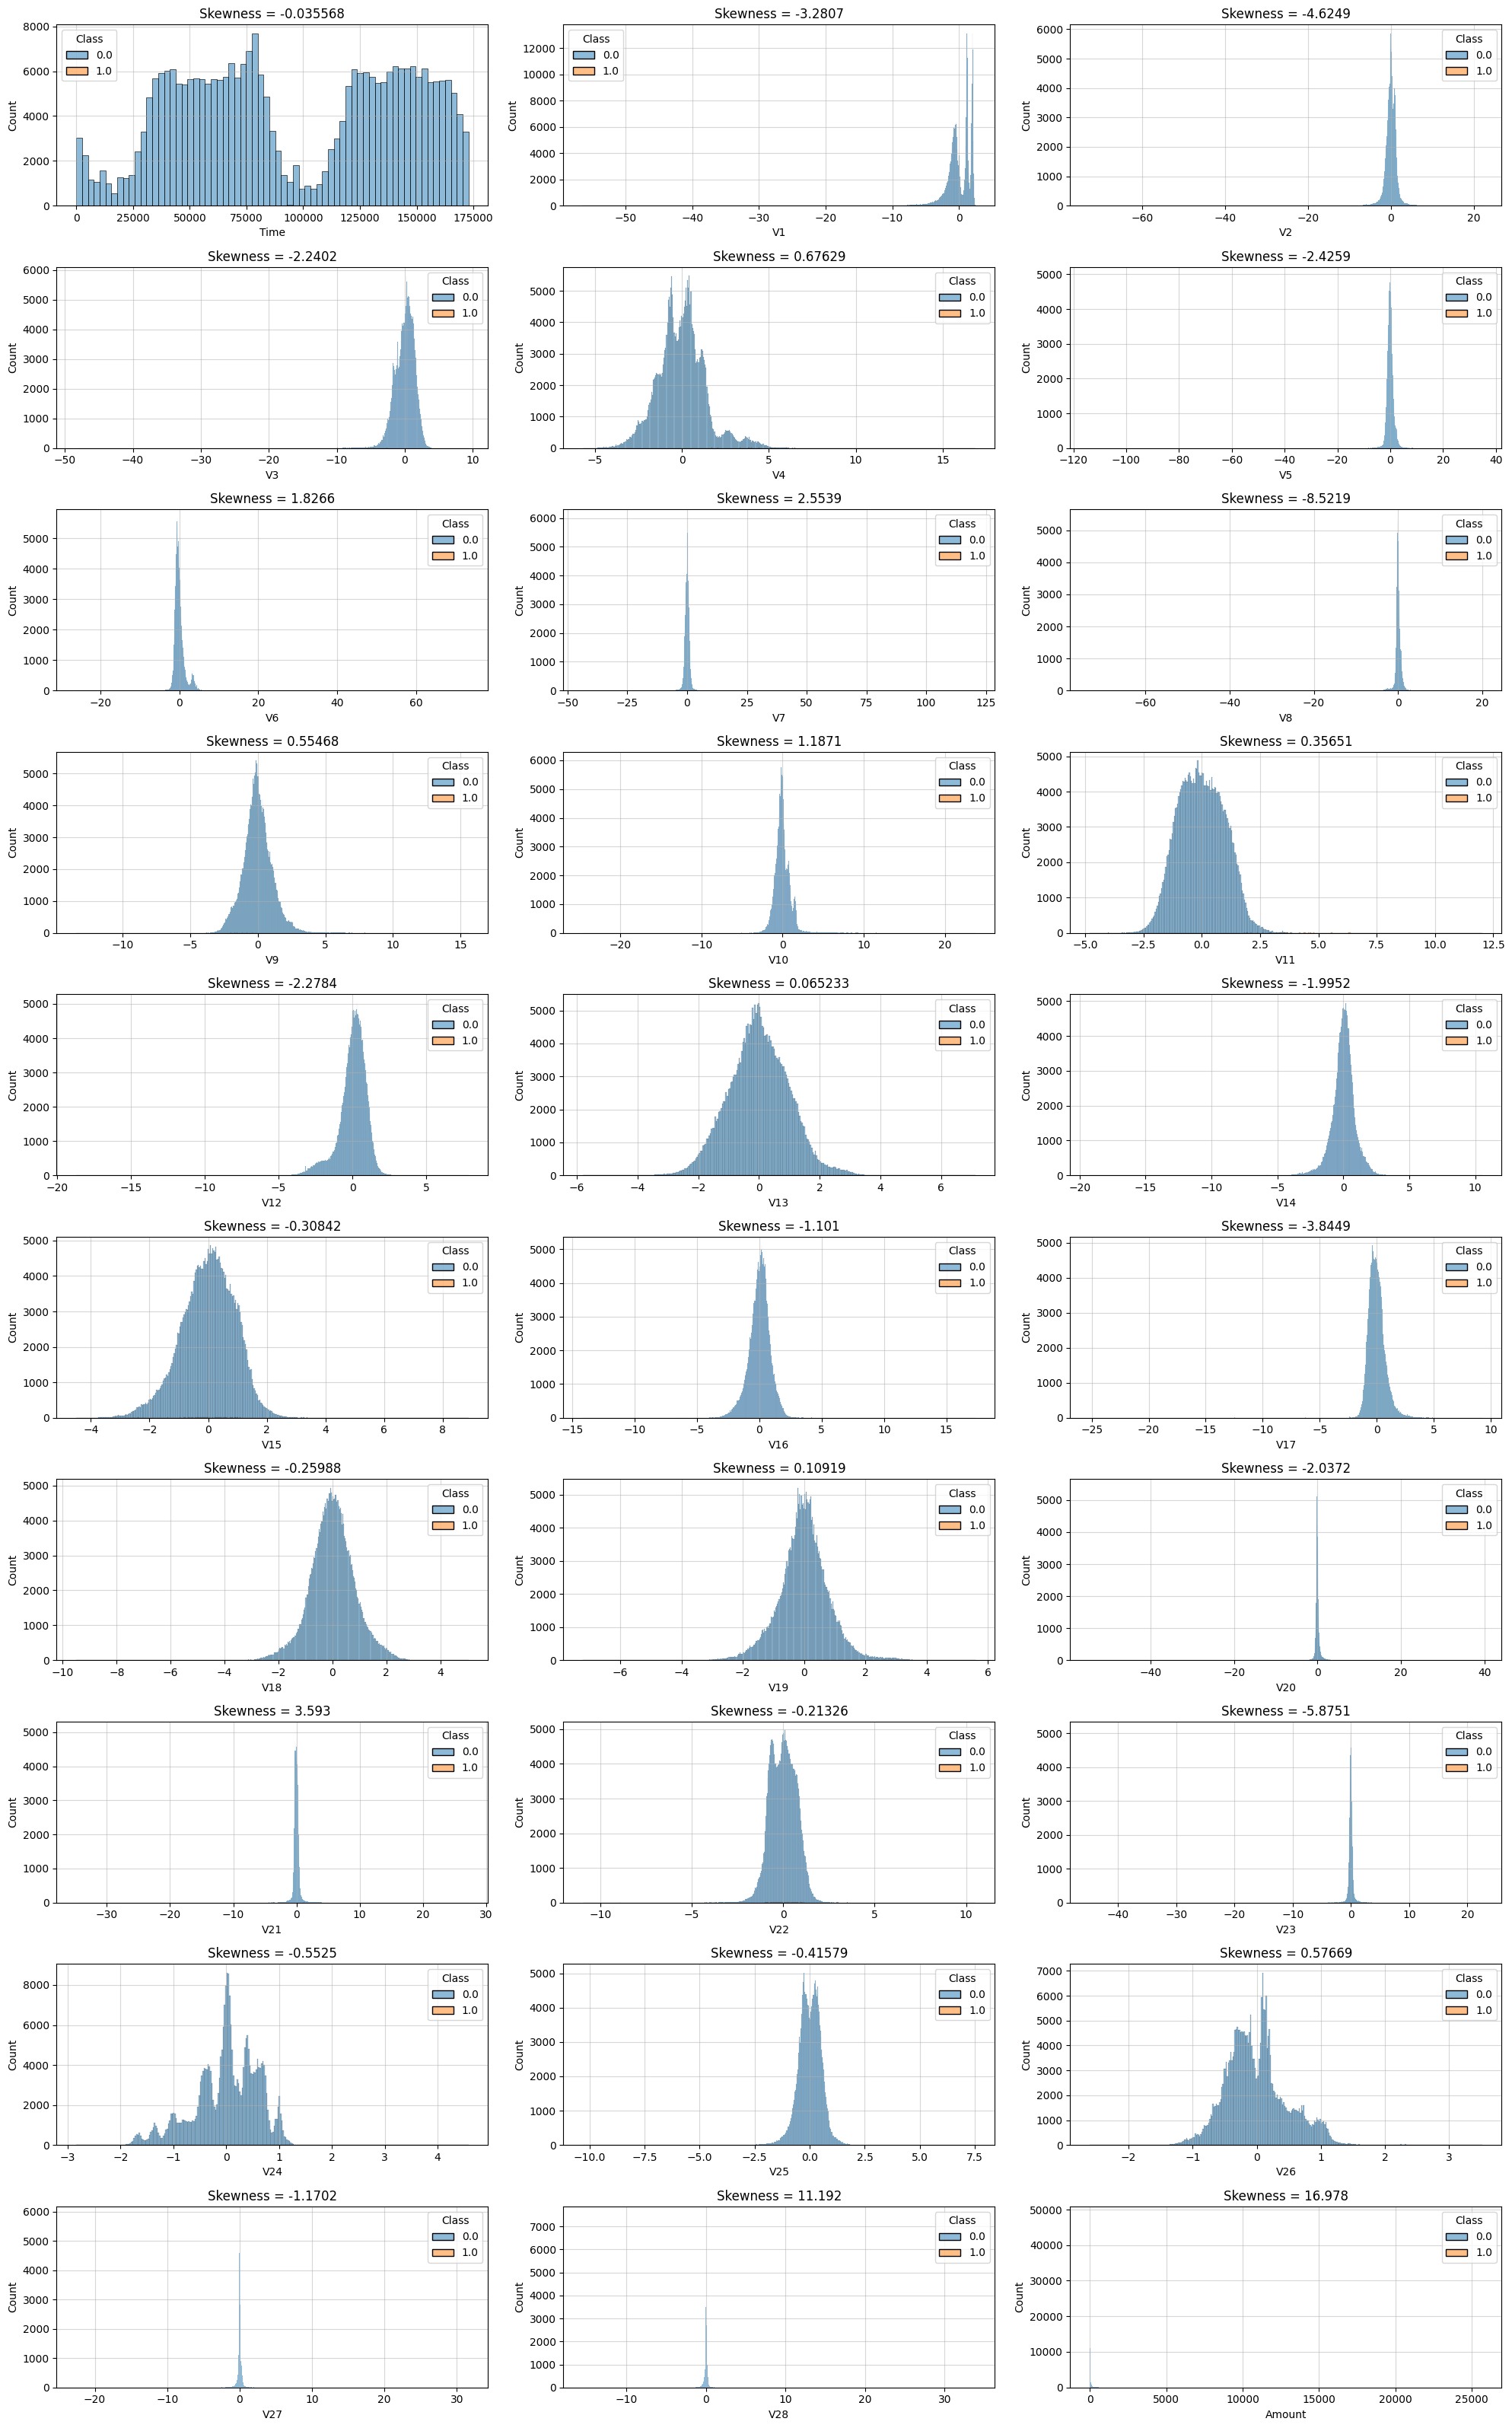

In [10]:
figure = plt.figure(figsize = (20, 32))
rows, cols = 10, 3

for id, feature in enumerate(raw_data.columns[:-1]):
    ax = figure.add_subplot(rows, cols, id + 1)
    ax.grid(alpha = 0.5, axis = "both")
    ax.set_title(f"Skewness = {raw_data[feature].skew(axis = 0, skipna = False):.{5}}")

    sns.histplot(data = raw_data, x = feature, hue = "Class")

    ax.set_xlabel(feature)

figure.tight_layout()
figure.show()

In [11]:
skewness = [
    (raw_data[feature].skew(axis=0, skipna=False), feature)
    for feature in raw_data.columns[:-1]
]

high_skew = [(value, name) for value, name in skewness if value > 10]

for value in sorted(high_skew, reverse=True):
    print(value)

high_skew_columns = [name for _, name in high_skew]

(np.float64(16.977724453761024), 'Amount')
(np.float64(11.192091192212809), 'V28')


#### Distribui√ß√£o e assimetria das vari√°veis

A visualiza√ß√£o mostra os histogramas das vari√°veis com separa√ß√£o por classe (`Class`) e o valor da skewness (assimetria) para cada uma delas. A skewness ajuda a identificar o grau de simetria da distribui√ß√£o.

##### üîπ Vari√°veis altamente enviesadas (|skewness| > 2)

Vari√°veis como `V3`, `V4`, `V10`, `V11`, `V20`, `V22`, `V23`, `V27`, `Amount` apresentam caudas longas (√† esquerda ou √† direita).

- Indicativo de distribui√ß√£o distorcida.
- **pode ser usado algum tipo de transforma√ß√£o** se for utilizar modelos sens√≠veis √† normalidade (ex: regress√£o log√≠stica).
- Muitas dessas vari√°veis mostram separa√ß√£o visual entre classes e **podem ser √∫teis para detec√ß√£o de fraude**.

##### üîπ Vari√°veis aproximadamente sim√©tricas (|skewness| < 0.5)

Exemplos: `V1`, `V5`, `V13`, `V15`, `V18`, `V19`, `V26`

- Distribui√ß√µes equilibradas e centradas.
- **Podem ser usadas diretamente**, sem necessidade de transforma√ß√£o.

##### üîπ Vari√°veis moderadamente enviesadas (0.5 ‚â§ |skewness| ‚â§ 2)

Exemplos: `V2`, `V6`, `V7`, `V8`, `V12`, `V14`, `V16`, `V17`, `V21`, `V24`, `V25`, `V28`

- Distribui√ß√µes levemente distorcidas.
- **Podem ser usadas diretamente**, sem necessidade de transforma√ß√£o.

##### üîπ Separa√ß√£o visual entre classes

Vari√°veis como `V4`, `V10`, `V14`, `V17`, `V21`, `V24`, `V27`, `V28`, `Amount` mostram padr√µes visivelmente diferentes entre transa√ß√µes leg√≠timas e fraudulentas.

- **Devem ser priorizadas** em modelos supervisionados por seu potencial preditivo.


### Avalia√ß√£o de Modelos de Classifica√ß√£o

O objetivo desta etapa √© avaliar o desempenho de diferentes modelos de classifica√ß√£o na detec√ß√£o de fraudes em transa√ß√µes de cart√£o de cr√©dito, considerando que o dataset √© altamente desbalanceado (menos de 0.2% de fraudes).

Ser√£o testados cinco modelos, em ordem crescente de complexidade:

1. Regress√£o Log√≠stica  
2. √Årvore de Decis√£o  
3. Random Forest  
4. GradientBoostingClassifier  
5. XGBClassifier

#### Estrat√©gia de Avalia√ß√£o

Para garantir uma avalia√ß√£o robusta e representativa, foram adotadas as seguintes pr√°ticas:

- **Estratifica√ß√£o dos dados**: tanto no split inicial quanto na valida√ß√£o cruzada, foi utilizado `StratifiedKFold` para manter a propor√ß√£o das classes em cada subdivis√£o (evitando que folds fiquem sem exemplos da classe minorit√°ria).

- **Transforma√ß√£o de vari√°veis altamente enviesadas**: foi utilizado o `PowerTransformer` (com `standardize=True`) **apenas nas colunas com skewness acima de 10**, com o objetivo de estabilizar a vari√¢ncia e tornar a distribui√ß√£o mais sim√©trica. Isso favorece a performance de modelos sens√≠veis √† distribui√ß√£o dos dados, como regress√£o log√≠stica.

- **Pipeline com pr√©-processamento**: cada modelo foi avaliado dentro de um `Pipeline` que inclui o pr√©-processamento. Isso garante que as transforma√ß√µes sejam aplicadas de forma consistente em cada fold durante a valida√ß√£o cruzada.

- **M√©trica de avalia√ß√£o**: como o dataset √© desbalanceado, a m√©trica escolhida foi o **F1-score**, que equilibra precis√£o e recall ‚Äî sendo mais adequada que a acur√°cia nesse tipo de problema.


#### Justificativa das T√©cnicas Utilizadas

- O uso de **valida√ß√£o cruzada estratificada** evita varia√ß√µes artificiais na distribui√ß√£o de classes durante o treino e teste.
- O `PowerTransformer` ajuda a lidar com vari√°veis com alta assimetria, o que pode ser especialmente √∫til em modelos lineares ou baseados em dist√¢ncia.
- A **ordem dos modelos** segue uma progress√£o de capacidade e complexidade, permitindo entender o ganho de desempenho √† medida que se aumenta o poder de modelagem.


#### Resumo

| Etapa               | Objetivo principal                              |
|---------------------|--------------------------------------------------|
| `GridSearchCV`      | Encontrar a melhor combina√ß√£o de par√¢metros      |
| K-Fold (manual)     | Avaliar robustez do modelo final                 |
| Avalia√ß√£o no `test` | Ver desempenho em dados nunca vistos pelo modelo |

#### M√©trica para treinamento dos modelos

F1-score

Equilibra precis√£o e recall, penalizando erros de ambos os tipos.
Ideal quando erros falsos positivos e falsos negativos s√£o ambos custosos, como em detec√ß√£o de fraude.

In [104]:
import os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report

In [62]:
X = raw_data.drop(columns=["Class"])
y = raw_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = ["precision", "f1", "roc_auc", "average_precision"]
refit="f1"

In [95]:
model_scores = {}

def report_cv_metrics(name, scores):
    print(f"\n=== {name} ===")
    metrics_summary = {}
    def fmt(arr):
            return f"{np.mean(arr):.4f} ¬± {np.std(arr):.4f}"

    print(f"Fit time.............: {fmt(scores['fit_time'])} s")
    for key, values in scores.items():
        if key.startswith("test_"):
            metric = key.replace("test_", "")
            mean = values.mean()
            std = values.std()
            print(f"{metric.upper():<20} Mean: {mean:.4f} | Std: {std:.4f}")
            metrics_summary[metric] = mean

    model_scores[name] = metrics_summary

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ("power", PowerTransformer(standardize=True), high_skew_columns),
    ],
    remainder="passthrough"
)

def create_pipeline(model, preprocessor=preprocessor):
    return Pipeline([
        ("preprocessing", preprocessor),
        ("clf", model)
    ])

In [92]:
def clean_params(params):
    return {k.replace("clf__", ""): v for k, v in grid.best_params_.items() }

#### Regress√£o Log√≠sstica

In [88]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42)

logreg_only_cols = list(set(['V3', 'V4', 'V10', 'V11', 'V20', 'V22', 'V23', 'V27']) - set(high_skew_columns))
all_power_cols = high_skew_columns + logreg_only_cols

logreg_preprocessor = ColumnTransformer(
    transformers=[
        ("power", PowerTransformer(standardize=True), all_power_cols),
    ],
    remainder="passthrough"
)

In [93]:
param_grid = {
    "clf__solver": ["lbfgs", "liblinear"],
    "clf__class_weight": [None, "balanced"],
}

grid = GridSearchCV(
    estimator=create_pipeline(lg, preprocessor=logreg_preprocessor),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=1,
)

grid.fit(X_train, y_train)

print("Melhores par√¢metros:", grid.best_params_)
print("Melhor F1-score m√©dio:", grid.best_score_)

best_logreg = LogisticRegression(**clean_params(grid.best_params_), random_state=42)

Melhores par√¢metros: {'clf__class_weight': None, 'clf__solver': 'lbfgs'}
Melhor F1-score m√©dio: 0.7276889420754338


In [ ]:
logreg_scores = cross_validate(create_pipeline(best_logreg, preprocessor=logreg_preprocessor), X_train, y_train, cv=cv, scoring=metrics, return_train_score=True)
report_cv_metrics("Logistic Regression", logreg_scores)


=== Logistic Regression ===
Fit time.............: 3.4448 ¬± 0.2402 s
PRECISION            Mean: 0.7833 | Std: 0.0432
F1                   Mean: 0.7277 | Std: 0.0242
ROC_AUC              Mean: 0.9297 | Std: 0.0042
AVERAGE_PRECISION    Mean: 0.6535 | Std: 0.0218


##### Avalia√ß√£o Inicial ‚Äì Logistic Regression

O modelo de Regress√£o Log√≠stica apresentou resultados consistentes considerando sua simplicidade:

Esses resultados indicam que o modelo possui boa capacidade de discriminar entre transa√ß√µes leg√≠timas e fraudulentas, mesmo em um cen√°rio de alto desbalanceamento. 

Ainda assim, m√©tricas como *average precision* sugerem que h√° espa√ßo para melhorias com modelos mais sofisticados.


#### √Årvore de Decis√£o

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__class_weight": [None, "balanced"],
}

grid = GridSearchCV(
    estimator=create_pipeline(dt),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores par√¢metros:", grid.best_params_)
print("Melhor F1-score m√©dio:", grid.best_score_)

best_dt = DecisionTreeClassifier(**clean_params(grid.best_params_), random_state=42)

Melhores par√¢metros: {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 5}
Melhor F1-score m√©dio: 0.837827708907015


In [99]:
dt_scores = cross_validate(
    create_pipeline(best_dt, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("Decision Tree", dt_scores)


=== Decision Tree ===
Fit time.............: 13.9082 ¬± 19.1473 s
PRECISION            Mean: 0.9061 | Std: 0.0346
F1                   Mean: 0.8378 | Std: 0.0146
ROC_AUC              Mean: 0.9056 | Std: 0.0312
AVERAGE_PRECISION    Mean: 0.7600 | Std: 0.0122


### Avalia√ß√£o Inicial ‚Äì Decision Tree

O modelo de √Årvore de Decis√£o apresentou desempenho superior √† Regress√£o Log√≠stica em quase todas as m√©tricas avaliadas:

- **Tempo de treino** m√©dio: `13.91 ¬± 19.15 s` ‚Äî mais alto e com grande varia√ß√£o, indicando instabilidade na complexidade dos modelos gerados.
- **Precis√£o (Precision)**: `0.9061 ¬± 0.0346` ‚Äî significativamente maior, sugerindo menor taxa de falsos positivos.
- **F1-score**: `0.8378 ¬± 0.0146` ‚Äî melhoria clara na capacidade de equilibrar precis√£o e recall.
- **√Årea sob a curva ROC (ROC AUC)**: `0.9056 ¬± 0.0312` ‚Äî levemente inferior ao da Regress√£o Log√≠stica, mas ainda alto.
- **Average Precision (PR AUC)**: `0.7600 ¬± 0.0122` ‚Äî avan√ßo relevante frente ao baseline da regress√£o (`0.6535`), indicando maior efetividade em dados desbalanceados.

Em resumo, a Decision Tree demonstra melhor capacidade de capturar padr√µes de fraude, com maior desempenho em m√©tricas pr√°ticas. No entanto, esse ganho vem acompanhado de maior custo computacional e varia√ß√£o no tempo de treinamento.

Embora a Regress√£o Log√≠stica tenha alcan√ßado um ROC AUC ligeiramente superior (`0.9297` vs. `0.9056`), a √Årvore de Decis√£o superou em m√©tricas mais sens√≠veis ao desbalanceamento (F1 e PR AUC), al√©m de oferecer maior precis√£o. Isso torna a Decision Tree uma alternativa mais eficaz para este problema, apesar do tempo de processamento mais elevado.


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=10, n_jobs=-1)

param_grid = {    
    "clf__max_leaf_nodes": [10, 20, 50, 100],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__class_weight": [None, "balanced"],
    "clf__criterion": ["gini", "entropy"],
}

grid = GridSearchCV(
    estimator=create_pipeline(rf),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores par√¢metros:", grid.best_params_)
print("Melhor F1-score m√©dio:", grid.best_score_)

best_rf = RandomForestClassifier(**clean_params(grid.best_params_), n_estimators=10, random_state=42, n_jobs=-1)

Melhores par√¢metros: {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_leaf_nodes': 50}
Melhor F1-score m√©dio: 0.8467664794228493


In [ ]:
rf_scores = cross_validate(
    create_pipeline(best_rf, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("Random Forest", rf_scores)


=== Random Forest ===
Fit time.............: 1.8286 ¬± 0.1033 s
PRECISION            Mean: 0.9505 | Std: 0.0247
F1                   Mean: 0.8468 | Std: 0.0061
ROC_AUC              Mean: 0.9597 | Std: 0.0159
AVERAGE_PRECISION    Mean: 0.8207 | Std: 0.0262


### Avalia√ß√£o Inicial ‚Äì Random Forest

O modelo de Random Forest obteve **excelente desempenho** geral, superando tanto a Regress√£o Log√≠stica quanto a √Årvore de Decis√£o na maioria dos crit√©rios:

- **Tempo de treino** m√©dio: `1.83 ¬± 0.10 s` ‚Äî surpreendentemente baixo, considerando que se trata de um ensemble de m√∫ltiplas √°rvores. A paraleliza√ß√£o e efici√™ncia do scikit-learn contribuem para esse resultado.
- **Precis√£o (Precision)**: `0.9505 ¬± 0.0247` ‚Äî a maior entre os modelos testados at√© agora, indicando uma taxa m√≠nima de falsos positivos.
- **F1-score**: `0.8468 ¬± 0.0061` ‚Äî ligeiramente acima do modelo de √Årvore de Decis√£o, com menor varia√ß√£o.
- **√Årea sob a curva ROC (ROC AUC)**: `0.9597 ¬± 0.0159` ‚Äî o melhor resultado at√© aqui, apontando forte capacidade de separa√ß√£o entre as classes.
- **Average Precision (PR AUC)**: `0.8207 ¬± 0.0262` ‚Äî consider√°vel avan√ßo em rela√ß√£o √† regress√£o log√≠stica (`0.6535`) e √† √°rvore (`0.7600`), essencial em problemas desbalanceados.

### Comparativo com Modelos Anteriores

| Modelo             | F1-score | ROC AUC | PR AUC | Observa√ß√µes                                 |
|--------------------|----------|---------|--------|---------------------------------------------|
| Regress√£o Log√≠stica| 0.7277   | 0.9297  | 0.6535 | Simples, mas limitado em dados complexos     |
| √Årvore de Decis√£o  | 0.8378   | 0.9056  | 0.7600 | Melhor F1 que LogReg, mas mais inst√°vel      |
| **Random Forest**  | **0.8468** | **0.9597** | **0.8207** | Melhor desempenho geral, com estabilidade    |

O **Random Forest** se destaca como o melhor modelo at√© o momento, apresentando **alto desempenho preditivo e robustez**, sendo especialmente eficaz na detec√ß√£o de fraudes sem comprometer a precis√£o.

**Treinamento do Random Forest j√° consome muito mais capacidade computacional**
![consumo de cpu para treino](image.png)
A partir deste modelos, todos j√° consomem mais recurso computacional devido ao numero de estimators dentro do ensemble.

#### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42, n_estimators=50)

param_grid = {
    "clf__learning_rate": [None, 0.05, 0.1],
    "clf__max_depth": [None, 3, 5, 10],
}

grid = GridSearchCV(
    estimator=create_pipeline(gb),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores par√¢metros:", grid.best_params_)
print("Melhor F1-score m√©dio:", grid.best_score_)

best_gb = GradientBoostingClassifier(**clean_params(grid.best_params_), random_state=42)

In [ ]:
gb_scores = cross_validate(
    create_pipeline(best_gb, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("Gradient Boosting", gb_scores)


KeyboardInterrupt: 

![recursos gradiant boosting](image-1.png)
**Parece que e o treinamento nao √© paralelizado/distribu√≠do como o Random Forest**

#### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_estimators=50, use_label_encoder=False, eval_metric="logloss")

param_grid = {
    "clf__learning_rate": [None, 0.05, 0.1],
    "clf__max_depth": [None, 3, 5, 10],
    "clf__scale_pos_weight": [None, 1, 10, 100],
}

grid = GridSearchCV(
    estimator=create_pipeline(xgb),
    param_grid=param_grid,
    scoring=metrics,
    refit=refit,
    cv=cv,
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Melhores par√¢metros:", grid.best_params_)
print("Melhor F1-score m√©dio:", grid.best_score_)

best_xgb = XGBClassifier(**clean_params(grid.best_params_), random_state=42, use_label_encoder=False, eval_metric="logloss")


In [ ]:
xgb_scores = cross_validate(
    create_pipeline(best_xgb, preprocessor),
    X_train,
    y_train,
    cv=cv,
    scoring=metrics,
    return_train_score=True
)

report_cv_metrics("XGBoost", xgb_scores)
